### Classification demo

In [1]:
# pre-requisites
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data
df = pd.read_csv('hearing_test.csv')
df.head(2)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1


### EDA

In [4]:
# get the general info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
# get the statistical info about dataset
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
# check if there are any NA values
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [7]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [7]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


### Split the data

In [8]:
# split the data into x and y
x = df.drop('test_result', axis=1)
y = df['test_result']

In [9]:
# split the data into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=123456)

### Build the model

In [10]:
# train the model

from sklearn.svm import SVC

# create a model
model = SVC()

# train the model
model.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Evaluate the model

In [11]:
y_pred = model.predict(x_test)
y_true = y_test

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc_score = roc_auc_score(y_true, y_pred)

print(confusion_matrix(y_true, y_pred))
print(f"accuracy = {accuracy}")
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")
print(f"roc_auc_score = {roc_auc_score}")

[[338  55]
 [ 22 585]]
accuracy = 0.923
precision = 0.9140625
recall = 0.9637561779242174
f1 = 0.9382518043303929
roc_auc_score = 0.9119035342547296


### Result Visualization

Text(0.5, 1.0, 'PREDICTED OUTPUT')

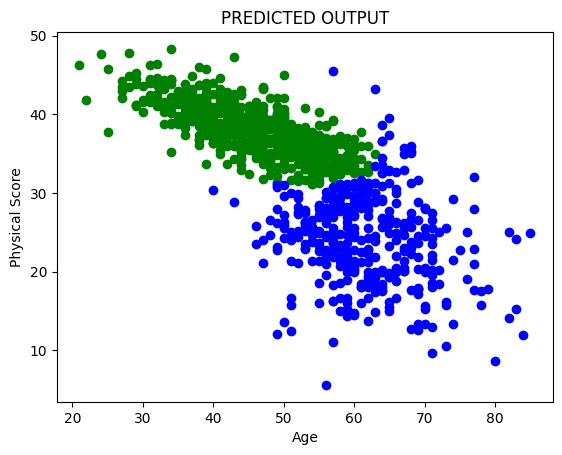

In [13]:
# Scatter plot to visualize the model’s predicted classes using : age and physical_score
# how your model classifies test data based on:
# Age
# Physical Score
# Green → test data points where the model Predicted class 1
# Blue → test data points where the model Predicted class 0

plt.scatter(x_test['age'][y_pred==1],x_test['physical_score'][y_pred==1],color="green")
plt.scatter(x_test['age'][y_pred==0],x_test['physical_score'][y_pred==0],color="blue")
plt.xlabel("Age")
plt.ylabel("Physical Score")
plt.title("PREDICTED OUTPUT")

Text(0.5, 1.0, 'OBSERVED OUTPUT')

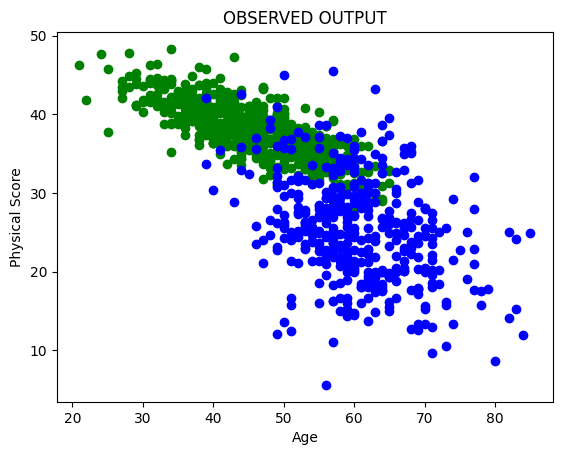

In [14]:
plt.scatter(x_test['age'][y_true==1],x_test['physical_score'][y_true==1],color="green")
plt.scatter(x_test['age'][y_true==0],x_test['physical_score'][y_true==0],color="blue")
plt.xlabel("Age")
plt.ylabel("Physical Score")
plt.title("OBSERVED OUTPUT")